In [1]:
from accelrod.benchmark import (
    benchmark_GEMM,
    to_pandas,
    plot_result,
    get_power_of_two_sequence,
    benchmark_GEMM_wrapper
)
from accelrod.device import get_gpu_free_memory
import torch
import numpy as np

In [2]:
# convert MB to bytes
total_free_bytes = get_gpu_free_memory() * 0.8 * 1024**2
# temporary assume benchmarking start with float64 so 8 bytes
max_n = np.sqrt(total_free_bytes / 5 / 8)
# 3 * (n**2) * 8

In [3]:
max_n

np.float64(7197.197676873965)

In [4]:
# Example usage
# Using your existing max_n value
sequence = get_power_of_two_sequence(max_n)
print(f"Powers of 2 up to {max_n}: {sequence}")

Powers of 2 up to 7197.197676873965: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]


In [5]:
torch.cuda.get_device_name()

'NVIDIA GeForce GTX 980'

In [6]:
result = benchmark_GEMM_wrapper(dtype=torch.float32)

device is None, automatically set to cuda
dtype is torch.float32, bytes_per_element: 4
matrix shape: (4096, 1, 4096)
cuda:0
cuda:0
2335.0
tflops: 0.017712900874555293, x: 0.0018943498999760776, arithmetic_intensity: 0.4997559785261103
device is None, automatically set to cuda
dtype is torch.float32, bytes_per_element: 4
matrix shape: (4096, 2, 4096)
cuda:0
cuda:0
2172.0
tflops: 0.035565107109468794, x: 0.0018869298999561579, arithmetic_intensity: 0.9990243902439024
device is None, automatically set to cuda
dtype is torch.float32, bytes_per_element: 4
matrix shape: (4096, 4, 4096)
cuda:0
cuda:0
2172.0
tflops: 0.06784104012125307, x: 0.0019784149500083003, arithmetic_intensity: 1.996101364522417
device is None, automatically set to cuda
dtype is torch.float32, bytes_per_element: 4
matrix shape: (4096, 8, 4096)
cuda:0
cuda:0
2171.0
tflops: 0.1430442787989113, x: 0.0018765899500067461, arithmetic_intensity: 3.9844357976653697
device is None, automatically set to cuda
dtype is torch.float32

In [7]:
# multiplier = 4
# result = []
# for n in sequence:
#     # for n in [1024]:
#     result.append(
#         benchmark_GEMM(
#             matrix_shape=(1024 * multiplier, n, 1024 * multiplier),
#             dtype=torch.float32,
#             number=20,
#         )
#     )

In [8]:
df = to_pandas(result)

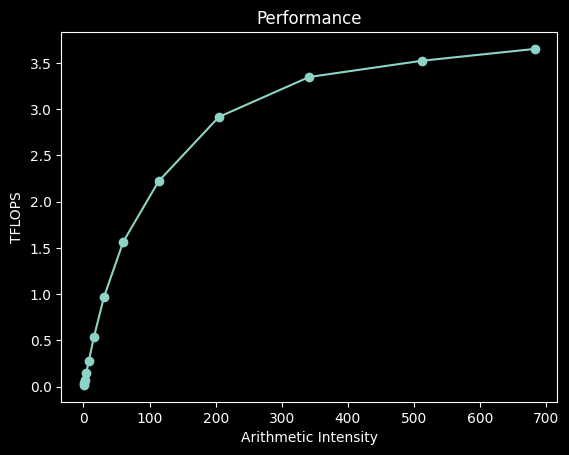

In [9]:
plot_result(df)